In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
df = pd.read_csv("./results/results.csv")


In [4]:
# Afficher les premières lignes du DataFrame
df.head()


,schema,DG_ted,JE_ted,JSF_ted,DG_number_errors,JE_number_errors,JSF_number_errors,correct_instance_ast_size,DG_ast_size,JE_ast_size,JSF_ast_size
0,o1,0.0,14.0,60.0,0.0,0.0,0.0,3,3.0,17.0,73.0
1,o10008,0.0,116.0,1.0,0.0,0.0,0.0,5,5.0,155.0,5.0
2,o10009,0.0,0.0,8.0,0.0,0.0,0.0,1,1.0,1.0,9.0
3,o10010,0.0,0.0,4.0,0.0,0.0,0.0,1,1.0,1.0,5.0
4,o10011,0.0,2.0,10.0,0.0,2.0,0.0,3,3.0,3.0,15.0



Statistiques pour chaque générateur :
 DG_ted       13869.0
JE_ted      364943.0
JSF_ted    6431355.0
dtype: float64


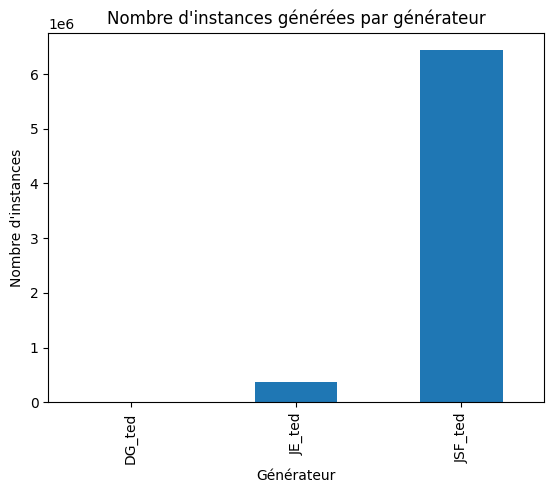

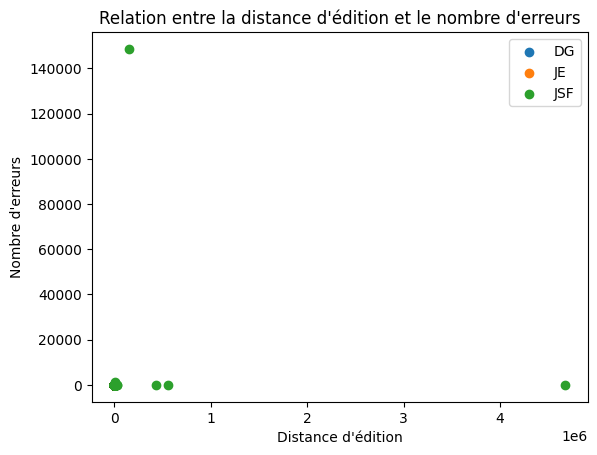

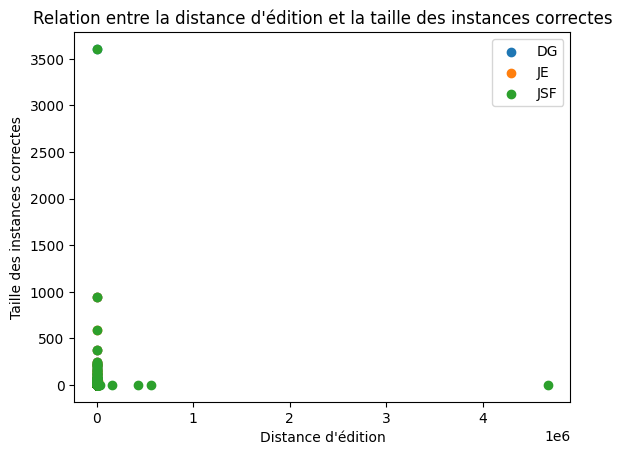

In [5]:


# Calculer les statistiques pour chaque générateur
stats_generators = df[['DG_ted', 'JE_ted', 'JSF_ted']].sum()
print("\nStatistiques pour chaque générateur :\n", stats_generators)

# Créer un graphique montrant le nombre d'instances générées par chaque générateur
stats_generators.plot(kind='bar', title='Nombre d\'instances générées par générateur')
plt.xlabel('Générateur')
plt.ylabel('Nombre d\'instances')
plt.show()

# Créer un graphique comparant le nombre d'erreurs avec la distance d'édition
plt.scatter(df['DG_ted'], df['DG_number_errors'], label='DG')
plt.scatter(df['JE_ted'], df['JE_number_errors'], label='JE')
plt.scatter(df['JSF_ted'], df['JSF_number_errors'], label='JSF')
plt.xlabel('Distance d\'édition')
plt.ylabel('Nombre d\'erreurs')
plt.title('Relation entre la distance d\'édition et le nombre d\'erreurs')
plt.legend()
plt.show()

# Créer un graphique montrant la relation entre la distance d'édition et la taille des instances correctes
plt.scatter(df['DG_ted'], df['correct_instance_ast_size'], label='DG')
plt.scatter(df['JE_ted'], df['correct_instance_ast_size'], label='JE')
plt.scatter(df['JSF_ted'], df['correct_instance_ast_size'], label='JSF')
plt.xlabel('Distance d\'édition')
plt.ylabel('Taille des instances correctes')
plt.title('Relation entre la distance d\'édition et la taille des instances correctes')
plt.legend()
plt.show()

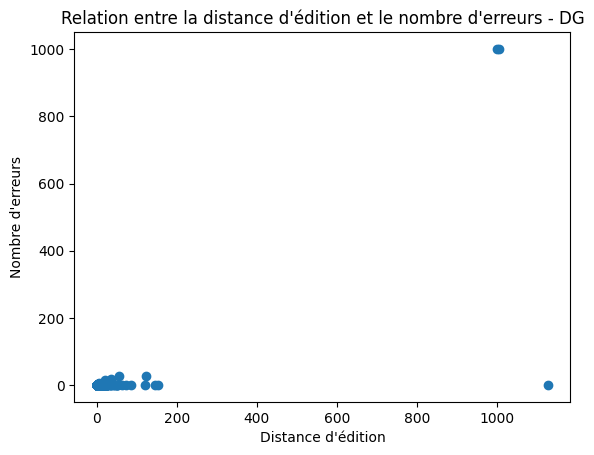

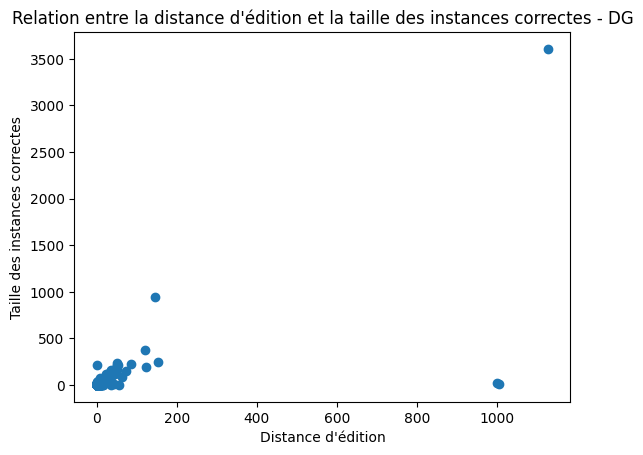

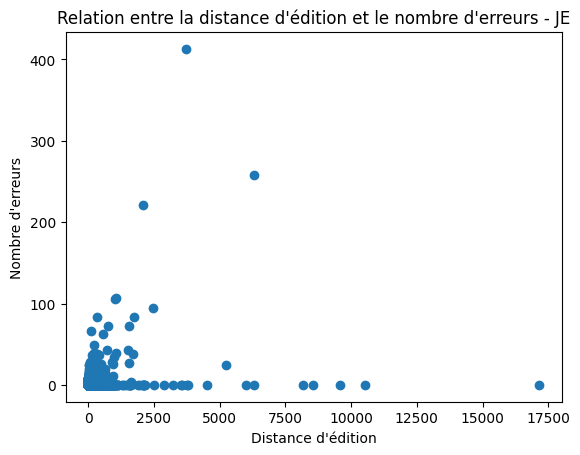

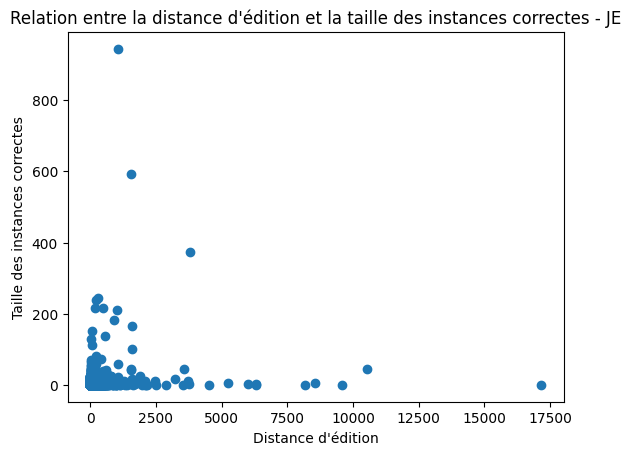

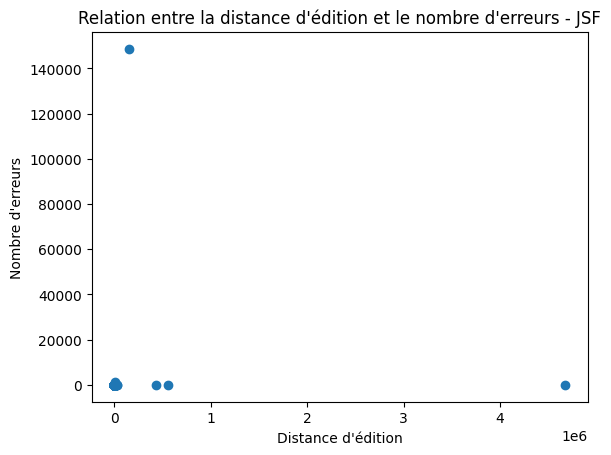

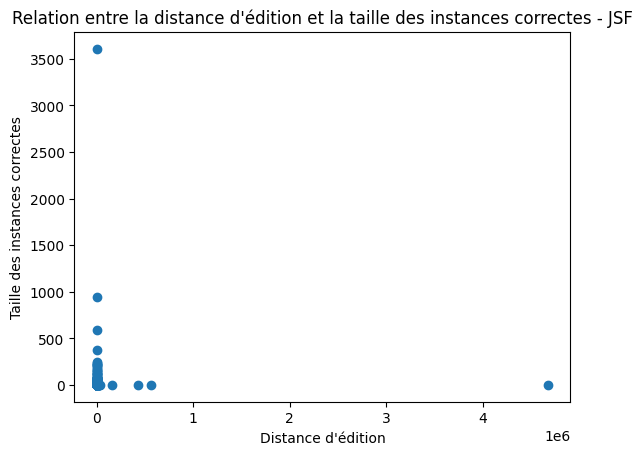

In [10]:
# Calculer les statistiques pour chaque générateur
stats_dg = df[['DG_ted', 'DG_number_errors', 'correct_instance_ast_size']].describe()
stats_je = df[['JE_ted', 'JE_number_errors', 'correct_instance_ast_size']].describe()
stats_jsf = df[['JSF_ted', 'JSF_number_errors', 'correct_instance_ast_size']].describe()

# print("\nStatistiques pour le générateur DG :\n", stats_dg)
# print("\nStatistiques pour le générateur JE :\n", stats_je)
# print("\nStatistiques pour le générateur JSF :\n", stats_jsf)

# Créer des graphiques pour chaque générateur

# Générateur DG
plt.scatter(df['DG_ted'], df['DG_number_errors'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Nombre d\'erreurs')
plt.title('Relation entre la distance d\'édition et le nombre d\'erreurs - DG')
plt.show()

plt.scatter(df['DG_ted'], df['correct_instance_ast_size'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Taille des instances correctes')
plt.title('Relation entre la distance d\'édition et la taille des instances correctes - DG')
plt.show()


# Générateur JE
plt.scatter(df['JE_ted'], df['JE_number_errors'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Nombre d\'erreurs')
plt.title('Relation entre la distance d\'édition et le nombre d\'erreurs - JE')
plt.show()

plt.scatter(df['JE_ted'], df['correct_instance_ast_size'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Taille des instances correctes')
plt.title('Relation entre la distance d\'édition et la taille des instances correctes - JE')
plt.show()

# Générateur JSF
plt.scatter(df['JSF_ted'], df['JSF_number_errors'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Nombre d\'erreurs')
plt.title('Relation entre la distance d\'édition et le nombre d\'erreurs - JSF')
plt.show()

plt.scatter(df['JSF_ted'], df['correct_instance_ast_size'])
plt.xlabel('Distance d\'édition')
plt.ylabel('Taille des instances correctes')
plt.title('Relation entre la distance d\'édition et la taille des instances correctes - JSF')
plt.show()


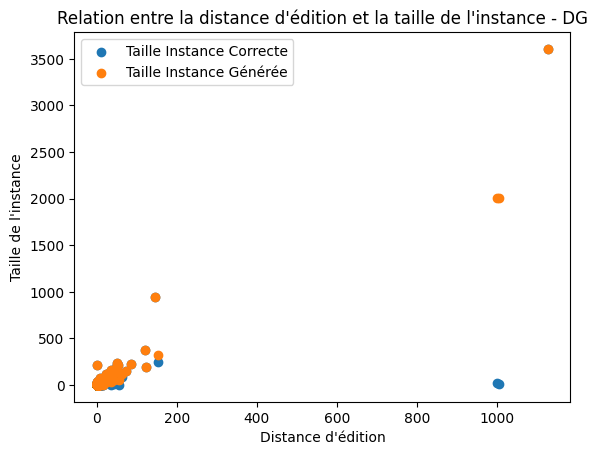

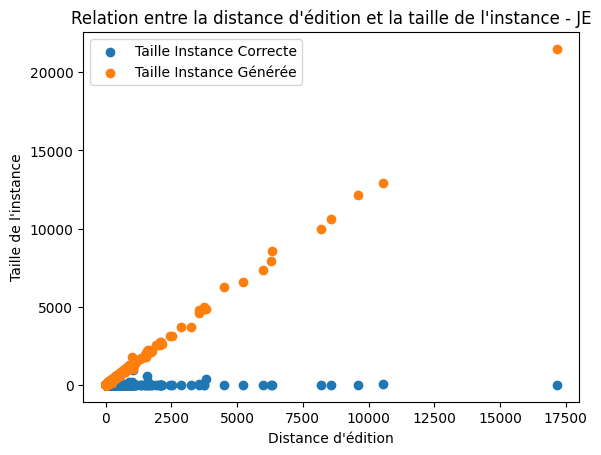

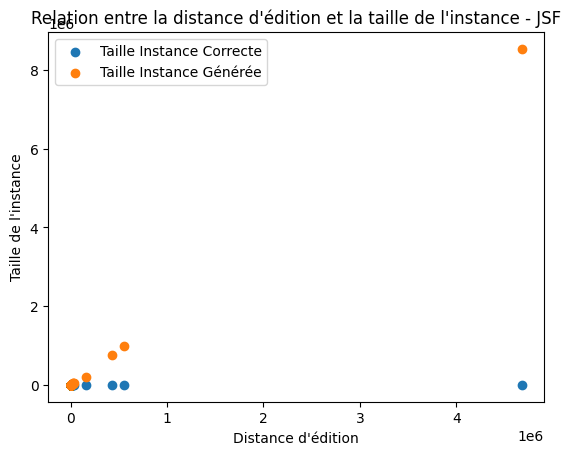

In [11]:
# Créer un graphique pour chaque générateur montrant la relation entre la distance d'édition,
# la taille de l'instance correcte et la taille de l'instance générée
generators = ['DG', 'JE', 'JSF']
for generator in generators:
    plt.scatter(df[f'{generator}_ted'], df[f'correct_instance_ast_size'], label='Taille Instance Correcte')
    plt.scatter(df[f'{generator}_ted'], df[f'{generator}_ast_size'], label='Taille Instance Générée')
    plt.xlabel('Distance d\'édition')
    plt.ylabel('Taille de l\'instance')
    plt.title(f'Relation entre la distance d\'édition et la taille de l\'instance - {generator}')
    plt.legend()
    plt.show()